<h1>Set NLP clustering on Nature journal</h1>
<h3>Goal: Cluster/classify abstracts per topic (i.e. biology, chemistry, physics, etc...) using Latent Dirichlet Allocation</h3>

<h2>(1) Scrap abstracts on nature.com</h2>

<h3>(1.1) Recover paper's urls from the main page, go to the next page, an so on... and store the urls in a list</h3>
<h3>let's start for a total of 2020 papers!</h3>

In [33]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage you want to scrape
url = 'https://www.nature.com/nature/research-articles'
url_article_list = []

def get_article_list(url, url_article_list):
    # Send an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        links = soup.find_all("a")
        for link in links:
            href = link.get('href')
            if href and 'articles' in href:
                url_article_list.append(href)

    else:
        print('Failed to retrieve the webpage. Status code:', response.status_code)

    return url_article_list 

In [138]:
url = 'https://www.nature.com/nature/research-articles'
url_article_list = []
url_article_list = get_article_list(url, url_article_list)

In [139]:
url_article_list

['//pubads.g.doubleclick.net/gampad/jump?iu=/285/nature.com/article-list&sz=728x90&pos=top;type=article-list;path=/nature/research-articles',
 'https://idp.nature.com/auth/personal/springernature?redirect_uri=https://www.nature.com/nature/research-articles',
 '/articles/s41586-023-06534-2',
 '/articles/s41586-023-06536-0',
 '/articles/s41586-023-06508-4',
 '/articles/s41586-023-06275-2',
 '/articles/s41586-023-06461-2',
 '/articles/s41586-023-06430-9',
 '/articles/s41586-023-06287-y',
 '/articles/s41586-023-06421-w',
 '/articles/s41586-023-06426-5',
 '/articles/s41586-023-06226-x',
 '/articles/s41586-023-06429-2',
 '/articles/s41586-023-06436-3',
 '/articles/s41586-023-06424-7',
 '/articles/s41586-023-06344-6',
 '/articles/s41586-023-06283-2',
 '/articles/s41586-023-06396-8',
 '/articles/s41586-023-06431-8',
 '/articles/s41586-023-06439-0',
 '/articles/s41586-023-06427-4',
 '/articles/s41586-023-06302-2',
 '/nature/research-articles?searchType=journalSearch&sort=PubDate&page=2',
 '/nat

In [35]:
url = 'https://www.nature.com'+url_article_list[-2]
print(url)

https://www.nature.com/nature/research-articles?searchType=journalSearch&sort=PubDate&page=2


In [36]:
for i in range(100):
    url = 'https://www.nature.com'+url_article_list[-2]
    url_article_list = get_article_list(url, url_article_list) 

In [37]:
len(url_article_list)

3124

In [40]:
url_article_list[0:29]

['//pubads.g.doubleclick.net/gampad/jump?iu=/285/nature.com/article-list&sz=728x90&pos=top;type=article-list;path=/nature/research-articles',
 'https://idp.nature.com/auth/personal/springernature?redirect_uri=https://www.nature.com/nature/research-articles',
 '/articles/s41586-023-06534-2',
 '/articles/s41586-023-06536-0',
 '/articles/s41586-023-06508-4',
 '/articles/s41586-023-06275-2',
 '/articles/s41586-023-06461-2',
 '/articles/s41586-023-06430-9',
 '/articles/s41586-023-06287-y',
 '/articles/s41586-023-06421-w',
 '/articles/s41586-023-06426-5',
 '/articles/s41586-023-06226-x',
 '/articles/s41586-023-06429-2',
 '/articles/s41586-023-06436-3',
 '/articles/s41586-023-06424-7',
 '/articles/s41586-023-06344-6',
 '/articles/s41586-023-06283-2',
 '/articles/s41586-023-06396-8',
 '/articles/s41586-023-06431-8',
 '/articles/s41586-023-06439-0',
 '/articles/s41586-023-06427-4',
 '/articles/s41586-023-06302-2',
 '/nature/research-articles?searchType=journalSearch&sort=PubDate&page=2',
 '/nat

In [41]:
url_article_ls = [i for i in url_article_list if '/articles/' in i]

In [42]:
len(url_article_ls)

2020

In [44]:
url_article_ls[0:29]

['/articles/s41586-023-06534-2',
 '/articles/s41586-023-06536-0',
 '/articles/s41586-023-06508-4',
 '/articles/s41586-023-06275-2',
 '/articles/s41586-023-06461-2',
 '/articles/s41586-023-06430-9',
 '/articles/s41586-023-06287-y',
 '/articles/s41586-023-06421-w',
 '/articles/s41586-023-06426-5',
 '/articles/s41586-023-06226-x',
 '/articles/s41586-023-06429-2',
 '/articles/s41586-023-06436-3',
 '/articles/s41586-023-06424-7',
 '/articles/s41586-023-06344-6',
 '/articles/s41586-023-06283-2',
 '/articles/s41586-023-06396-8',
 '/articles/s41586-023-06431-8',
 '/articles/s41586-023-06439-0',
 '/articles/s41586-023-06427-4',
 '/articles/s41586-023-06302-2',
 '/articles/s41586-023-06222-1',
 '/articles/s41586-023-06359-z',
 '/articles/s41586-023-06312-0',
 '/articles/s41586-023-06521-7',
 '/articles/s41586-023-06515-5',
 '/articles/s41586-023-06492-9',
 '/articles/s41586-023-06514-6',
 '/articles/s41586-023-06392-y',
 '/articles/s41586-023-06397-7']

<h2>(1.2) Scrap the abstract from the paper's pages using a for loop on the list of urls, and store it in a dictionnary</h2>

In [13]:
def get_article(url):
    # Send an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        links = soup.find_all(id='Abs1-content')

    else:
        print('Failed to retrieve the webpage. Status code:', response.status_code)
    try:
        return links[0].get_text()
    except:
        return ''

In [ ]:
papers_dict = {}
count = len(url_article_ls)
for item in url_article_ls:
    try:
        url = 'https://www.nature.com'+item
        papers_dict[item] = get_article(url)
        count -= 1
        print(count)
    except:
        count -= 1
        print(count)
        pass

In [27]:
import pandas as pd
df = pd.DataFrame(data = {'url' : list(papers_dict.keys()), 'abstract' : list(papers_dict.values())})

In [29]:
df.to_csv('data.csv')

<h1>Let's jump into NLP clustering of Nature abstract</h1>

In [143]:
import pandas as pd
df = pd.read_csv('data.csv', index_col=[0])
df = df[df['abstract'].notna()].reset_index()
df = df.drop(columns = ['index'])

In [144]:
df.head(5)

,url,abstract
0,/articles/s41586-023-06534-2,Electrochemical synthesis can provide more sus...
1,/articles/s41586-023-06536-0,The integer quantum anomalous Hall (QAH) effec...
2,/articles/s41586-023-06508-4,Endothelial cells (ECs) line the blood and lym...
3,/articles/s41586-023-06275-2,Controlling quantum materials with light is of...
4,/articles/s41586-023-06461-2,Homologous recombination (HR) deficiency is as...


<h2>(2) Cleaning du dataset</h2>

<h3>(2.1) Suppress punctuation</h3>

In [145]:
import string
ls_punct = string.punctuation

def remove_ponctuation(email, ls_punct):
    for punct in ls_punct:
        email = email.replace(punct,'')
    return email

In [146]:
df['abstract'] = df['abstract'].apply(lambda x: remove_ponctuation(x, ls_punct))

In [147]:
df.head(5)

,url,abstract
0,/articles/s41586-023-06534-2,Electrochemical synthesis can provide more sus...
1,/articles/s41586-023-06536-0,The integer quantum anomalous Hall QAH effect ...
2,/articles/s41586-023-06508-4,Endothelial cells ECs line the blood and lymph...
3,/articles/s41586-023-06275-2,Controlling quantum materials with light is of...
4,/articles/s41586-023-06461-2,Homologous recombination HR deficiency is asso...


<h3>(2.2) Lower case</h3>

In [148]:
df['clean_text'] = df['abstract'].apply(lambda x: x.lower())
df['clean_text']

0       electrochemical synthesis can provide more sus...
1       the integer quantum anomalous hall qah effect ...
2       endothelial cells ecs line the blood and lymph...
3       controlling quantum materials with light is of...
4       homologous recombination hr deficiency is asso...
                              ...                        
1935    there has been considerable recent progress in...
1936    quantum manybody systems display rich phase st...
1937    cd8 t cellmediated autoimmune diseases result ...
1938    confocal microscopy1 remains a major workhorse...
1939    during the current coronavirus disease 2019 co...
Name: clean_text, Length: 1940, dtype: object

<h3>(2.3) Suppress digits</h3>

In [149]:
def remove_numb(email):
    for numb in ['0','1','2','3','4','5','6','7','8','9']:
        email = email.replace(numb,'')
    return email    

In [150]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_numb(x))

<h3>(2.4) Suppress stopwords</h3>

In [151]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/jerome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jerome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jerome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jerome/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [152]:
# Utiliser ces outils
from nltk.corpus import stopwords 
from nltk import word_tokenize

In [153]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/jerome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
def remove_stopwords(abstract):
    output = [i for i in word_tokenize(abstract) if i not in stopwords.words('english')]
    return output

In [155]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))

In [156]:
df['clean_text'].loc[0]

['electrochemical',
 'synthesis',
 'provide',
 'sustainable',
 'routes',
 'industrial',
 'chemicals',
 'electrosynthetic',
 'oxidations',
 'often',
 'may',
 'performed',
 '“',
 'reagentfree',
 '”',
 'generating',
 'hydrogen',
 'h',
 'derived',
 'substrate',
 'sole',
 'byproduct',
 'counter',
 'electrode',
 'electrosynthetic',
 'reductions',
 'however',
 'require',
 'external',
 'source',
 'electrons',
 'sacrificial',
 'metal',
 'anodes',
 'commonly',
 'used',
 'smallscale',
 'applications',
 'sustainable',
 'options',
 'needed',
 'large',
 'scale',
 'anodic',
 'water',
 'oxidation',
 'especially',
 'appealing',
 'option',
 'many',
 'reductions',
 'require',
 'anhydrous',
 'airfree',
 'reaction',
 'conditions',
 'cases',
 'h',
 'represents',
 'ideal',
 'alternative',
 'motivating',
 'growing',
 'interest',
 'electrochemical',
 'hydrogen',
 'oxidation',
 'reaction',
 'hor',
 'nonaqueous',
 'conditions',
 'report',
 'mediated',
 'h',
 'anode',
 'achieves',
 'indirect',
 'electrochemical',

<h3>(2.5) Lemmatize</h3>

In [157]:
#Utiliser cet outil
from nltk.stem import WordNetLemmatizer

In [158]:
def lemmatize_email(abstract):
    lemmatizer = WordNetLemmatizer()
    output = []
    for word in abstract:
        output.append(lemmatizer.lemmatize(word))
    return ' '.join(output)

In [159]:
df['clean_text'] = df['clean_text'].apply(lambda x : lemmatize_email(x))

In [160]:
df['clean_text']

0       electrochemical synthesis provide sustainable ...
1       integer quantum anomalous hall qah effect latt...
2       endothelial cell ec line blood lymphatic vascu...
3       controlling quantum material light fundamental...
4       homologous recombination hr deficiency associa...
                              ...                        
1935    considerable recent progress protein structure...
1936    quantum manybody system display rich phase str...
1937    cd cellmediated autoimmune disease result brea...
1938    confocal microscopy remains major workhorse bi...
1939    current coronavirus disease covid pandemic var...
Name: clean_text, Length: 1940, dtype: object

<h2>(3) CountVectorize</h2>

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
X = vectorizer.fit_transform(df.clean_text)
len(vectorizer.get_feature_names_out())
X.shape

(1940, 1000)

## (4) Find topics using LDA

In [163]:
from sklearn.decomposition import LatentDirichletAllocation

In [164]:
lda = LatentDirichletAllocation()

In [165]:
res = lda.fit_transform(X)

In [166]:
res[0]

array([0.00163959, 0.00163985, 0.0696455 , 0.0016397 , 0.00163975,
       0.00163959, 0.00163979, 0.0016398 , 0.91723674, 0.00163969])

In [167]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 20), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=1.5)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

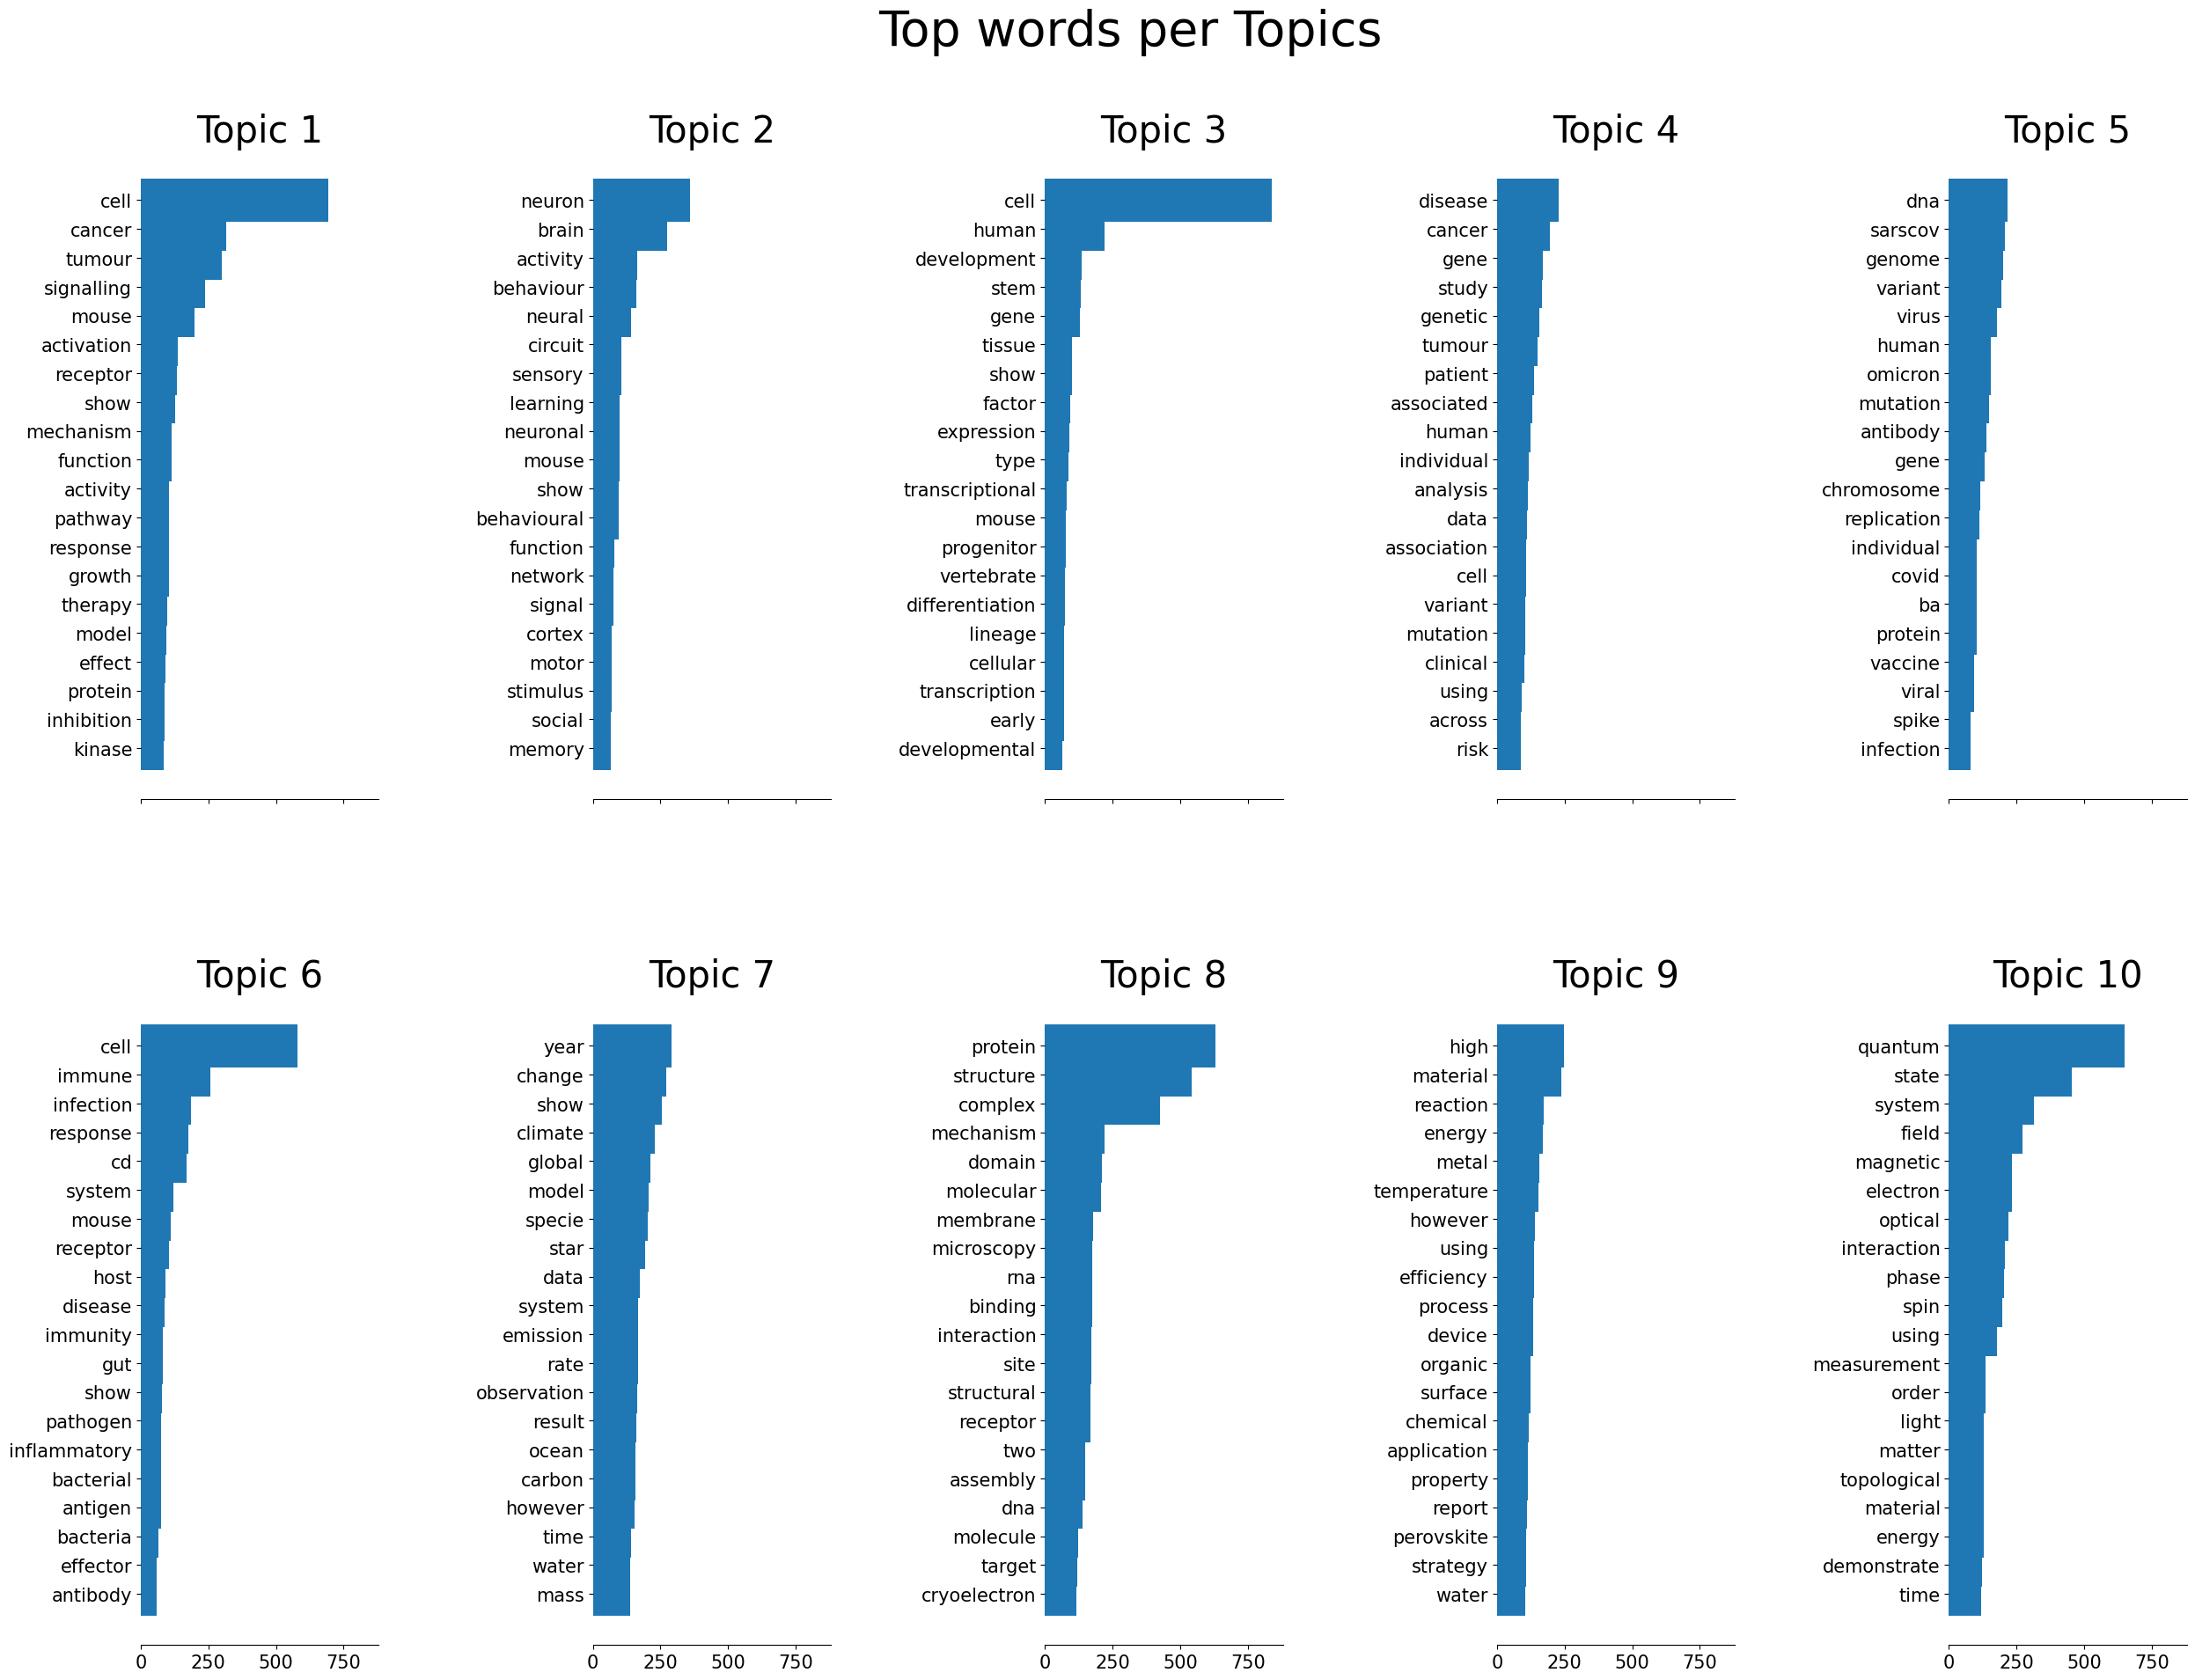

In [169]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 20
title = 'Top words per Topics'
plot_top_words(lda, feature_names, n_top_words, title)